In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
# import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from scipy import stats as st
import statsmodels as sts
import statsmodels.api as sm

%matplotlib inline

In [2]:
d1=pd.read_csv("Brooklyn_zipcodes.csv")
d2=pd.read_csv("Manhattan_zipcodes.csv")
df2 = pd.concat([d1,d2])

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31692 entries, 0 to 16846
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      31692 non-null  int64  
 1   id                              31692 non-null  float64
 2   name                            31681 non-null  object 
 3   host_id                         31692 non-null  int64  
 4   host_name                       31642 non-null  object 
 5   neighbourhood_group             31692 non-null  object 
 6   neighbourhood                   31692 non-null  object 
 7   latitude                        31692 non-null  float64
 8   longitude                       31692 non-null  float64
 9   room_type                       31692 non-null  object 
 10  price                           31692 non-null  int64  
 11  minimum_nights                  31692 non-null  int64  
 12  number_of_reviews               

In [4]:
df2. columns. values. tolist() 

['Unnamed: 0',
 'id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'ZipCodes',
 'review']

In [5]:
df2.sample(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,ZipCodes,review
834,1801,2243266.0,Top floor!,11457662,Indie,Brooklyn,Bensonhurst,40.60987,-73.99810,Entire home/apt,...,30,0,NaN,NaN,2,0,0,NaN,NaN,0
6931,16027,30389441.0,Tribeca Studio w/ Indoor pool & Gym,107434423,Blueground,Manhattan,Tribeca,40.71579,-74.00587,Entire home/apt,...,31,0,NaN,NaN,453,326,0,NaN,10013.0,0
10308,24120,46725288.0,Murrays Luxury One Bedroom with Views,61391963,Stay With Vibe,Manhattan,Kips Bay,40.74109,-73.97811,Entire home/apt,...,30,3,5/19/22,0.26,116,343,3,NaN,10016.0,0
9415,22089,42925669.0,Amazing UES 1 Bed w/ Laundry and Doorman #6132,113723310,MyNyHousing,Manhattan,Upper East Side,40.77316,-73.94999,Entire home/apt,...,30,5,5/1/22,0.20,60,311,2,NaN,10028.0,0
7460,17775,34542125.0,Downstairs Bedroom in Duplex w/ tempur-pedic q...,258243498,Ben,Brooklyn,Williamsburg,40.70426,-73.94074,Private room,...,5,29,8/11/22,0.72,4,78,11,NaN,NaN,0


In [6]:
df2.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ZipCodes,review
count,31692.000000,3.169200e+04,3.169200e+04,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,24866.000000,31692.000000,31692.000000,31692.000000,20479.000000,31692.000000
mean,19072.854506,1.063137e+17,1.188996e+08,40.725295,-73.963851,214.810047,20.485233,25.661113,1.120183,17.638047,121.128329,7.102550,10352.955467,0.261170
std,11538.048573,2.381332e+17,1.420285e+08,0.053204,0.028928,377.397039,32.548342,55.958150,1.978491,62.814198,135.105459,19.055758,533.169905,0.439279
min,0.000000,2.539000e+03,2.438000e+03,40.574130,-74.058610,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,10000.000000,0.000000
25%,8863.750000,1.390583e+07,1.034821e+07,40.686677,-73.986980,87.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000,10016.000000,0.000000
50%,18735.500000,3.554305e+07,4.754619e+07,40.720590,-73.961950,148.000000,30.000000,5.000000,0.450000,1.000000,61.000000,0.000000,10028.000000,0.000000
75%,28950.250000,5.190263e+07,1.945077e+08,40.761530,-73.944510,240.000000,30.000000,23.000000,1.560000,4.000000,260.000000,5.000000,11206.000000,1.000000
max,39880.000000,7.096930e+17,4.781609e+08,40.878210,-73.858140,16500.000000,1250.000000,1480.000000,123.000000,453.000000,365.000000,949.000000,11385.000000,1.000000


In [7]:
df2['review'].value_counts()

0    23415
1     8277
Name: review, dtype: int64

In [8]:
X = pd.get_dummies(data=df2.drop('number_of_reviews', axis=1), 
                   columns=['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'ZipCodes',
 'review'],
prefix =['id','name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'ZipCodes',
 'review'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31692 entries, 0 to 16846
Columns: 127708 entries, Unnamed: 0 to review_1
dtypes: int64(1), uint8(127707)
memory usage: 3.8 GB


In [9]:
X.describe()

,Unnamed: 0,id_2539.0,id_2595.0,id_5121.0,id_5136.0,id_5178.0,id_5203.0,id_5803.0,id_6848.0,id_6872.0,...,ZipCodes_11235.0,ZipCodes_11236.0,ZipCodes_11237.0,ZipCodes_11238.0,ZipCodes_11239.0,ZipCodes_11249.0,ZipCodes_11251.0,ZipCodes_11385.0,review_0,review_1
count,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,...,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000,31692.000000
mean,19072.854506,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,...,0.002619,0.004165,0.006058,0.006563,0.000252,0.006216,0.000252,0.000063,0.738830,0.261170
std,11538.048573,0.005617,0.005617,0.005617,0.005617,0.005617,0.005617,0.005617,0.005617,0.005617,...,0.051109,0.064404,0.077600,0.080748,0.015886,0.078598,0.015886,0.007944,0.439279,0.439279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8863.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18735.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,28950.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,39880.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
y = df2['review'].copy()
y.replace(['1','0'],[1,0],inplace=True)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: review, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

In [12]:
train_X.shape

(25353, 127708)

In [13]:
train_y.shape

(25353,)

In [14]:
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [15]:
gauss_nb.fit(train_X, train_y)

GaussianNB()

In [16]:
pred_y_gnb = gauss_nb.predict(test_X)

In [22]:
from sklearn import neighbors

knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)

In [24]:
knn5.fit(train_X, train_y)

KNeighborsClassifier()

In [25]:
pred_y_knn5 = knn5.predict(test_X)

In [26]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[4178  530]
 [1135  496]]


In [27]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

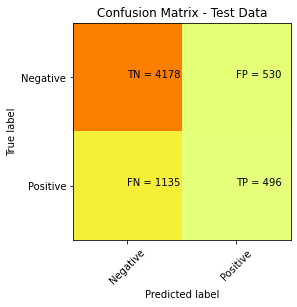

In [28]:
print_cm(cm)

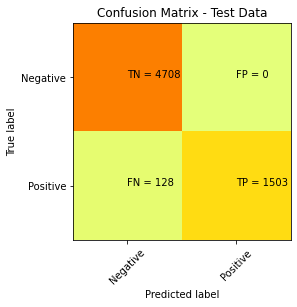

In [29]:
print_cm(metrics.confusion_matrix(test_y, pred_y_gnb))

In [30]:
metrics.accuracy_score(test_y, pred_y_gnb)

0.9798075406215492

In [31]:
metrics.roc_auc_score(test_y, pred_y_gnb)

0.9607602697731453

In [32]:
metrics.cohen_kappa_score(test_y, pred_y_gnb)

0.9457757604433146

In [33]:
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4708
           1       1.00      0.92      0.96      1631

    accuracy                           0.98      6339
   macro avg       0.99      0.96      0.97      6339
weighted avg       0.98      0.98      0.98      6339

